In [1]:
# Dependencies
import tweepy
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import time
import csv

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Create function 
# Pull 500 most recent tweets
def twit_function(user):
    compound = []
    oldest_tweet = None
    for x in range(5):
        target_tweets = api.search("@" + user, count=100, result_type="recent", max_id=oldest_tweet)
        #target_tweets = api.user_timeline("@" + user, count=100, pages=5, result_type="recent")
        for tweet in target_tweets['statuses']:
            results = analyzer.polarity_scores(tweet["text"])
            compound.append(results["compound"])
            sentiments = {"Compound": compound}
    oldest_tweet = tweet['id'] - 1
# Plot 
    x_vals = np.arange(len(sentiments["Compound"]))
    y_vals = sentiments["Compound"]
    twitplot = plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
        alpha=0.8, label="@CNN")

# Graph properties
    now = datetime.now()
    now = now.strftime("%Y/%m/%d")
    plt.title(f"Sentiment Analysis of Tweets ({now}) for {user}")
    plt.xlim([x_vals.max(),x_vals.min()])
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    plt.legend(twitplot)
    figname = user + " analy.png"
    plt.savefig(figname) # save plot as png
    plt.show()

# create tweet, upload pic, and post
    api.update_with_media(figname, "New tweet analysis: @" + user + " (requested by: " ")")

# append to csv
    with open("tweet_log.csv", 'a') as file:
        writer = csv.writer(file)
        writer.writerow([user])


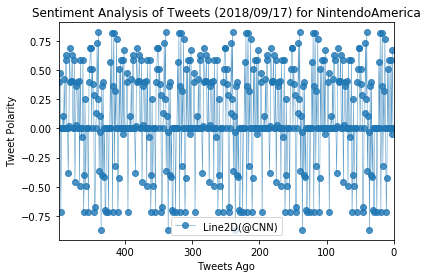

In [ ]:
# Infinite loop
while(True):

    
    public_tweets = api.search("@Anthony64355136", rpp=10) #tweets per page, up to 100
    for tweet in public_tweets['statuses']:
        request_list = []
        requester_list = []
        request_list.append(tweet['entities']['user_mentions'][1]['screen_name'])
        requester_list.append(tweet['user']['screen_name'])

# Check to see if request has already been made
    for user in request_list:
        already = False
        with open("tweet_log.csv", 'r') as file:
            for row in csv.reader("tweet_log.csv"):
                if user == row:
                    already = True
            if already is False:
                twit_function(user)

    # Every five minutes, scan own account for tweets
    time.sleep(300)
